In [1]:
import cv2
from torchvision import transforms
from PIL import Image
import torch

# Define your transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),  # Convert grayscale to 3-channel
    transforms.Resize((224, 224)),                # Resize to match ResNet input
    transforms.ToTensor(),                        # Convert to tensor
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)  # Normalize for 3 channels
])

# Open the video file or webcam (0 for webcam)
video_path = "000_003.mp4"
cap = cv2.VideoCapture(video_path)

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break

    # Convert frame (OpenCV uses BGR, convert to RGB)
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert to PIL image
    pil_img = Image.fromarray(frame_rgb)

    # Apply the transform
    transformed_frame = transform(pil_img)  # Tensor shape: (3, 224, 224)

    # (Optional) Add batch dimension if you want to feed to a model
    input_tensor = transformed_frame.unsqueeze(0)  # Shape: (1, 3, 224, 224)

    # Use the tensor in your model or further processing
    print(input_tensor.shape)

    # (Optional) break after one frame
    # break

cap.release()
cv2.destroyAllWindows()

torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1, 3, 224, 224])
torch.Size([1,

Total frames: 396, Selected frames: [  0  43  87 131 175 219 263 307 351 395]
Showing transformed frame 1


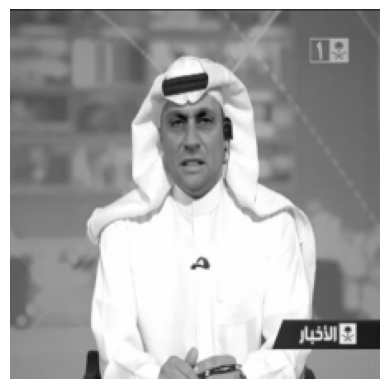

Showing transformed frame 2


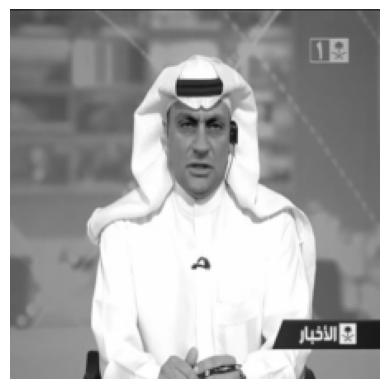

Showing transformed frame 3


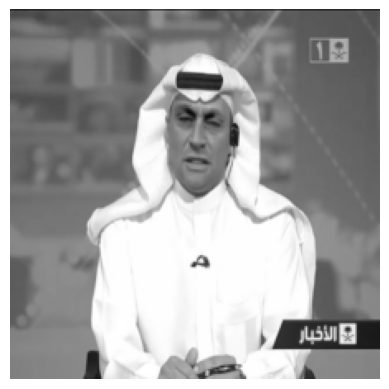

Showing transformed frame 4


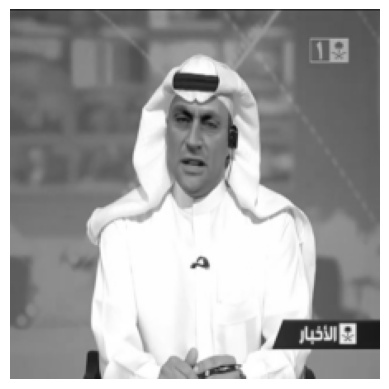

Showing transformed frame 5


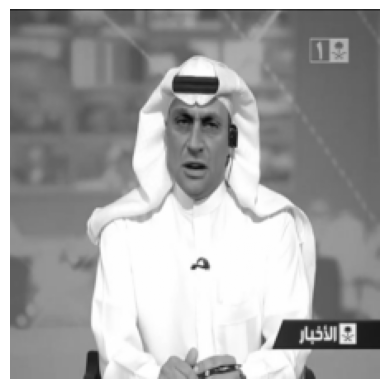

Showing transformed frame 6


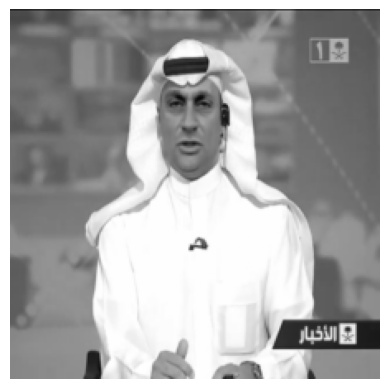

Showing transformed frame 7


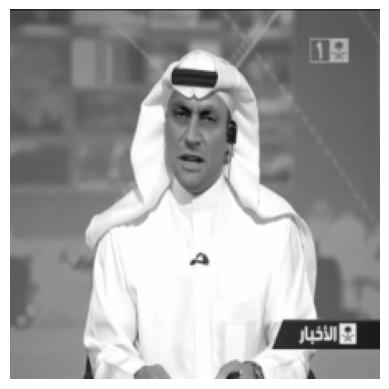

Showing transformed frame 8


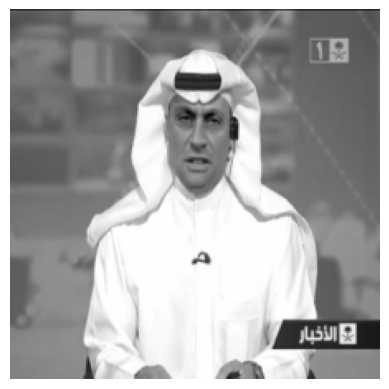

Showing transformed frame 9


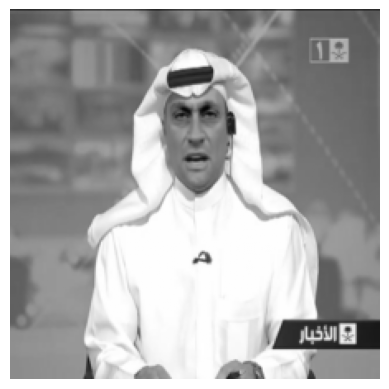

Showing transformed frame 10


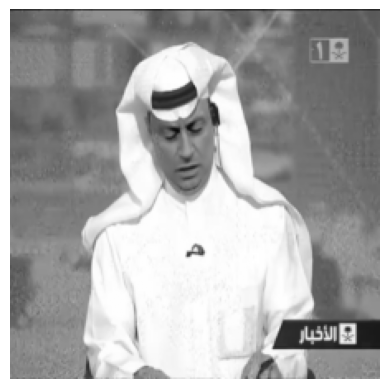

In [2]:
import cv2
from torchvision import transforms
from PIL import Image
import torch
import matplotlib.pyplot as plt
import numpy as np

# Define transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Reverse transform to show image (for visualization)
unnormalize = transforms.Normalize(
    mean=[-1, -1, -1],
    std=[2, 2, 2]
)

# Function to show tensor as image
def show_tensor_image(tensor):
    tensor = unnormalize(tensor)  # Reverse normalization
    np_img = tensor.permute(1, 2, 0).numpy()  # Convert to HWC format
    plt.imshow(np.clip(np_img, 0, 1))
    plt.axis('off')
    plt.show()

# Open video
video_path = "000_003.mp4"
cap = cv2.VideoCapture(video_path)
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Select 10 evenly spaced frame indices
selected_indices = np.linspace(0, total_frames - 1, 10, dtype=int)

print(f"Total frames: {total_frames}, Selected frames: {selected_indices}")

current_frame = 0
captured = 0

while cap.isOpened() and captured < 10:
    ret, frame = cap.read()
    if not ret:
        break

    if current_frame in selected_indices:
        # Convert to RGB
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        pil_img = Image.fromarray(frame_rgb)

        # Apply transform
        tensor_img = transform(pil_img)

        # Display output
        print(f"Showing transformed frame {captured + 1}")
        show_tensor_image(tensor_img)

        captured += 1

    current_frame += 1

cap.release()
cv2.destroyAllWindows()

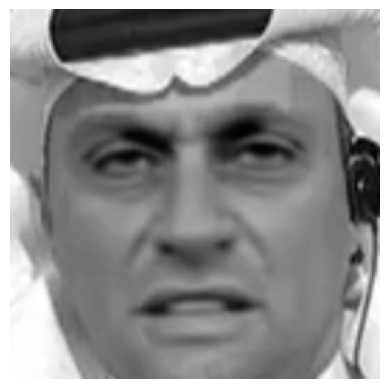

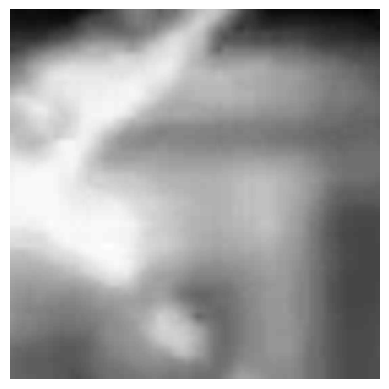

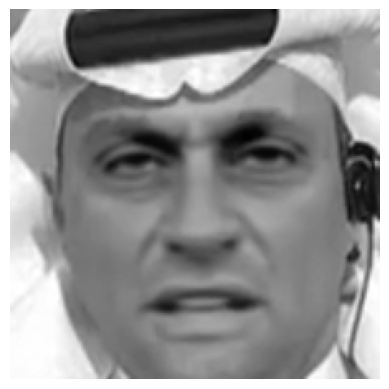

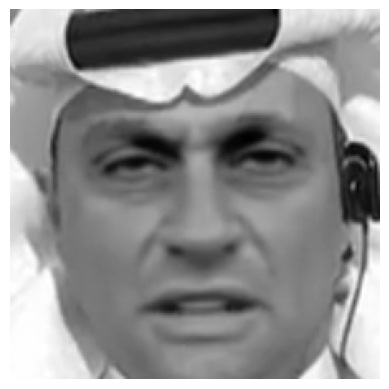

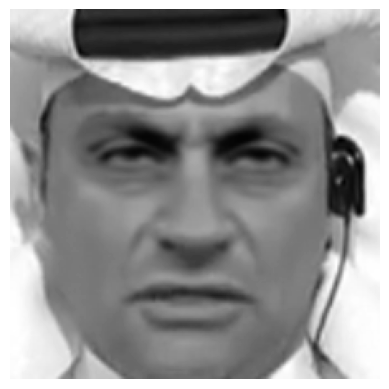

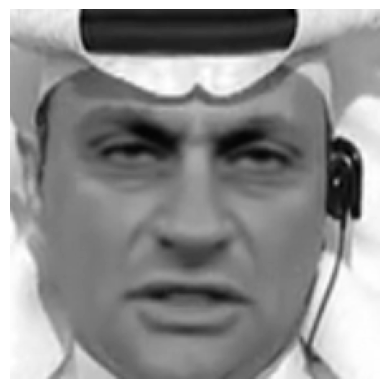

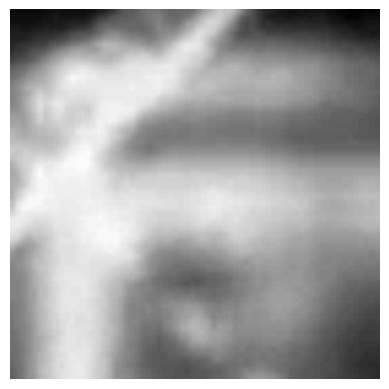

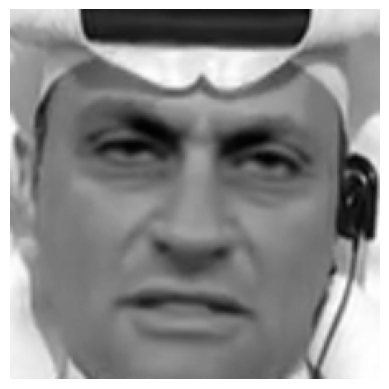

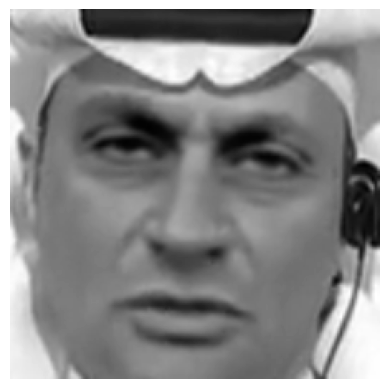

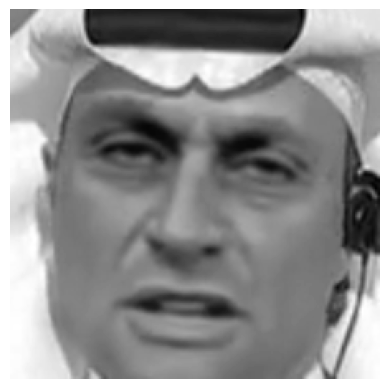

In [3]:
import cv2
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np

# Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Transform for the face
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# To undo normalization and display
unnormalize = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])

def show_tensor_image(tensor):
    tensor = unnormalize(tensor)
    np_img = tensor.permute(1, 2, 0).numpy()
    plt.imshow(np_img[:, :, 0], cmap='gray')  # Display single channel
    plt.axis('off')
    plt.show()

# Path to video file
video_path =  "000_003.mp4"  # Replace with your actual path
cap = cv2.VideoCapture(video_path)

frame_count = 0
processed_frames = 0

while cap.isOpened() and processed_frames < 10:
    ret, frame = cap.read()
    if not ret:
        break

    # Process every 10th frame (optional)
    if frame_count % 10 == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

        if len(faces) > 0:
            (x, y, w, h) = faces[0]
            face = frame[y:y+h, x:x+w]
            face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(face_rgb)

            tensor_img = transform(pil_img)
            show_tensor_image(tensor_img)
            processed_frames += 1

    frame_count += 1

cap.release()

In [4]:
pip install ultralytics

100%|█████████████████████████████████████████████████████████████████████████████| 6.25M/6.25M [00:00<00:00, 6.67MB/s]


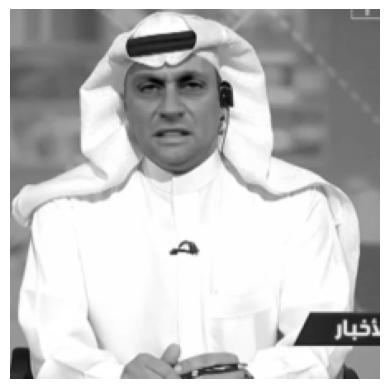

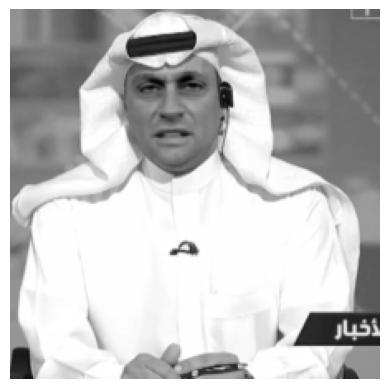

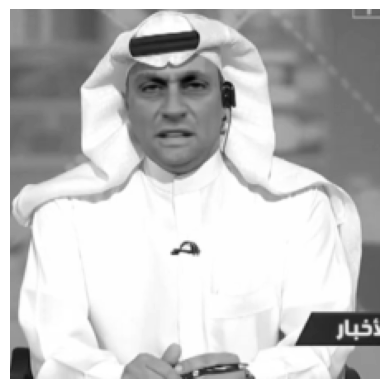

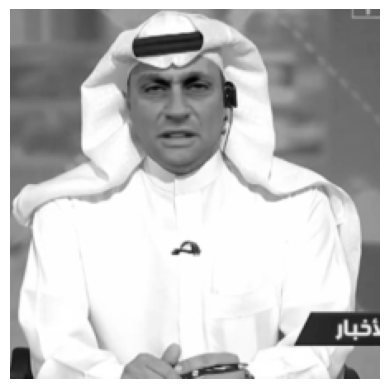

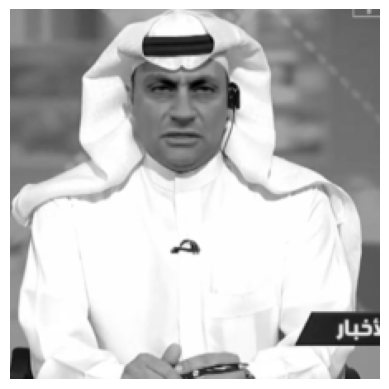

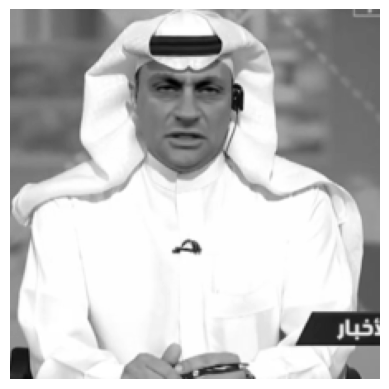

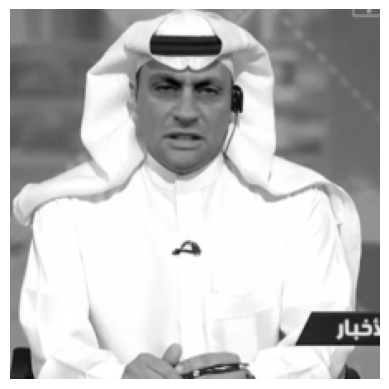

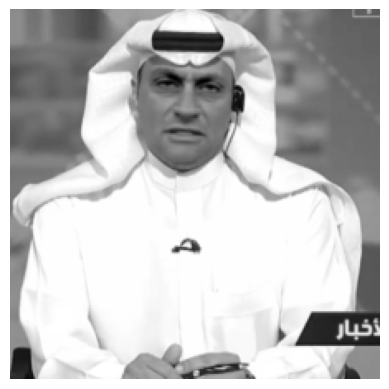

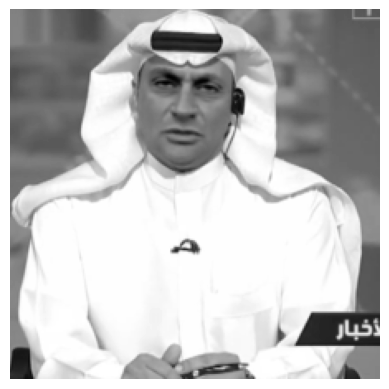

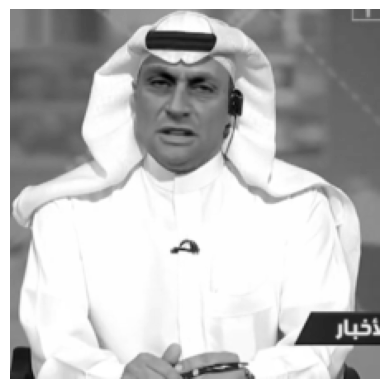

In [5]:
import cv2
from PIL import Image
from torchvision import transforms
import torch
import matplotlib.pyplot as plt
import numpy as np
from ultralytics import YOLO

# Load YOLOv5 model (use a custom face model or yolov8n/yolov5s)
model = YOLO("yolov8n.pt")  # Replace with a face-specific model if available

# Transform
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# Undo normalization
unnormalize = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])

def show_tensor_image(tensor):
    tensor = unnormalize(tensor)
    np_img = tensor.permute(1, 2, 0).numpy()
    plt.imshow(np_img[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

# Open video
cap = cv2.VideoCapture("000_003.mp4")
frame_count = 0
processed_frames = 0

while cap.isOpened() and processed_frames < 10:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % 10 == 0:
        results = model(frame, verbose=False)[0]

        # Get first face-like bounding box (class 0 is person)
        for box in results.boxes:
            cls_id = int(box.cls[0])
            if cls_id == 0:  # 'person'
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                face = frame[y1:y2, x1:x2]
                if face.size == 0:
                    continue
                face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
                pil_img = Image.fromarray(face_rgb)

                tensor_img = transform(pil_img)
                show_tensor_image(tensor_img)

                processed_frames += 1
                break  # only one face per frame

    frame_count += 1

cap.release()

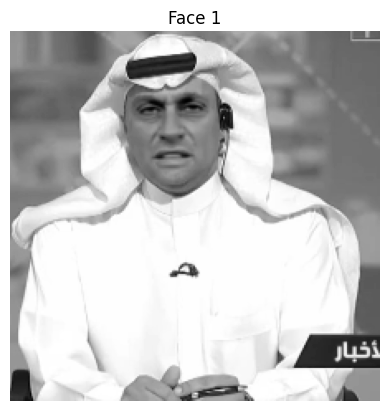

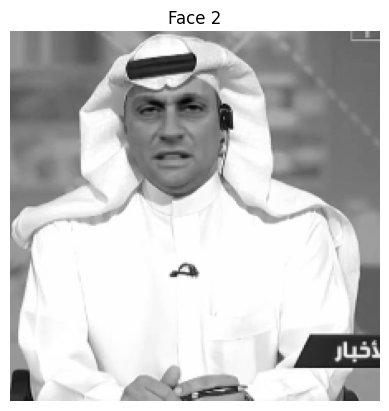

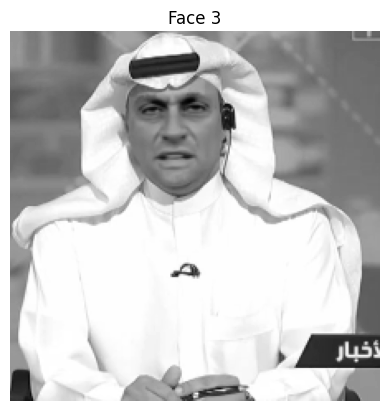

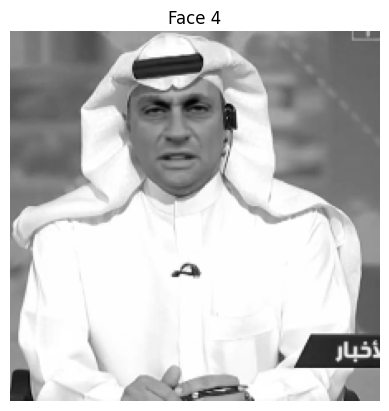

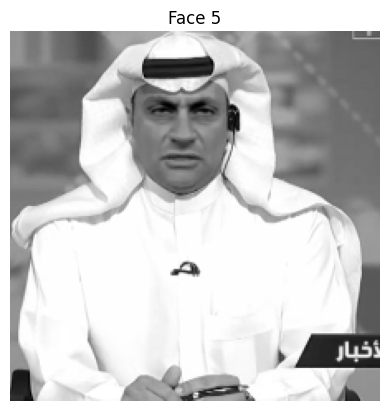

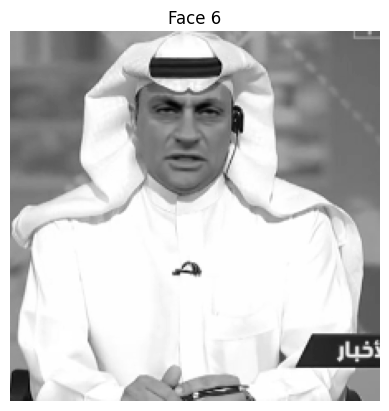

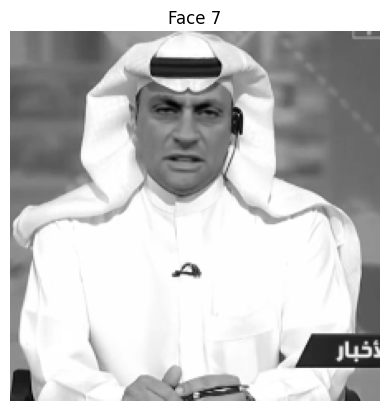

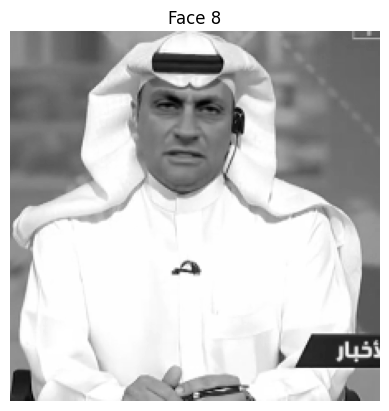

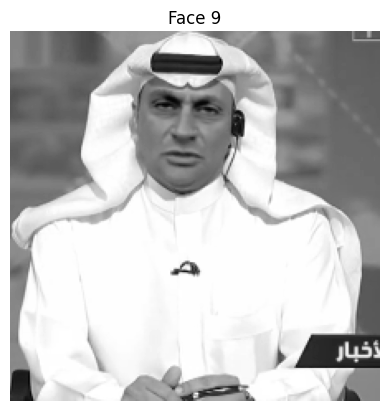

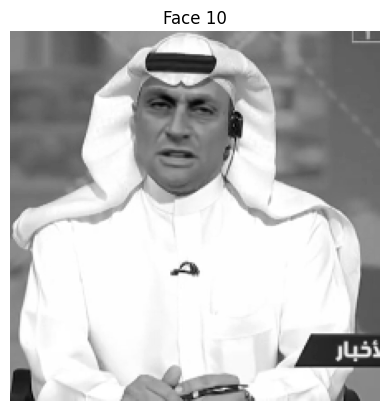

In [6]:
import cv2
import torch
import matplotlib.pyplot as plt

from ultralytics import YOLO

# Load YOLOv8 model
model = YOLO('yolov8n.pt')  # or use yolov8s.pt for better accuracy

# Open video file
video_path = '000_003.mp4'  # Replace with your video path
cap = cv2.VideoCapture(video_path)

frame_count = 0
processed_faces = 0

while cap.isOpened() and processed_faces < 10:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % 10 == 0:
        # Run YOLO inference
        results = model(frame, verbose=False)[0]

        for box in results.boxes:
            cls_id = int(box.cls[0])
            if cls_id == 0:  # class 0 is 'person'
                x1, y1, x2, y2 = map(int, box.xyxy[0])
                face = frame[y1:y2, x1:x2]

                if face.size == 0:
                    continue

                # Convert to grayscale
                face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)

                # Resize to 224x224
                face_resized = cv2.resize(face_gray, (224, 224))

                # Display using matplotlib
                plt.imshow(face_resized, cmap='gray')
                plt.title(f"Face {processed_faces + 1}")
                plt.axis('off')
                plt.show()

                processed_faces += 1
                break  # Only one face per frame

    frame_count += 1

cap.release()


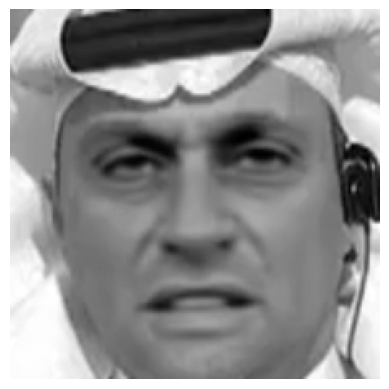

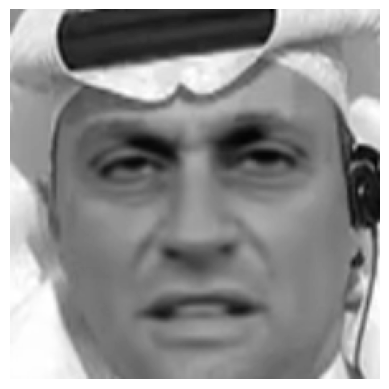

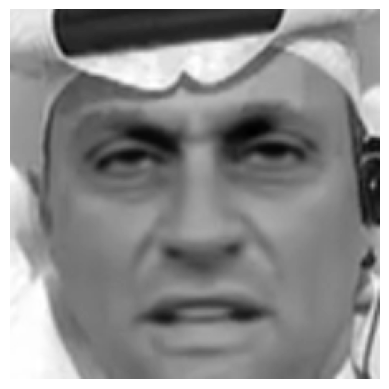

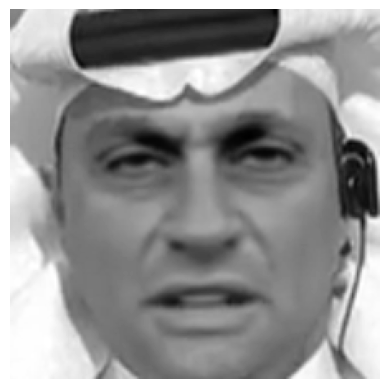

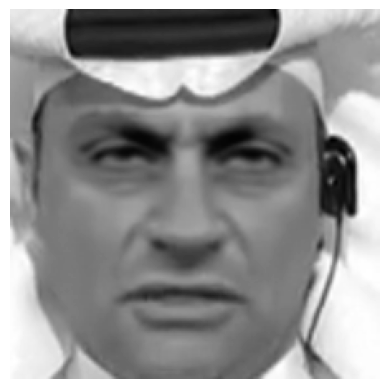

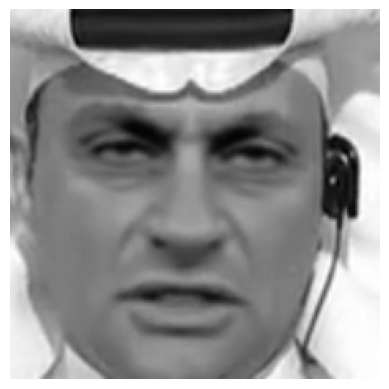

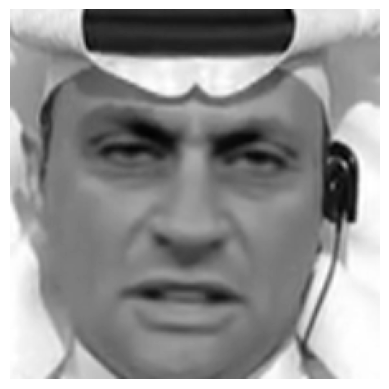

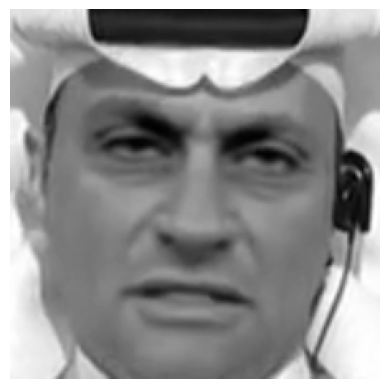

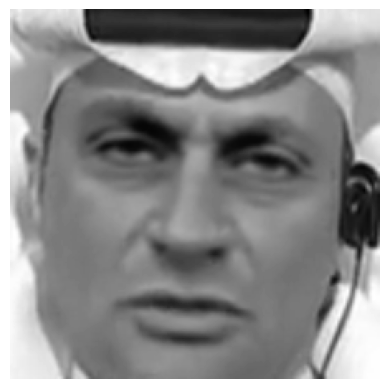

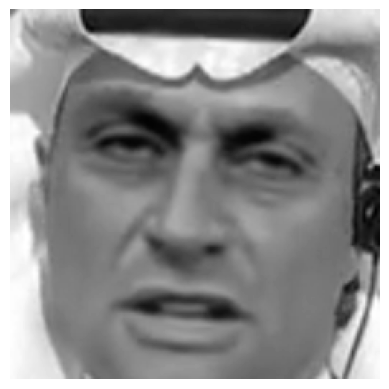

In [7]:
import cv2
from PIL import Image
from torchvision import transforms
import matplotlib.pyplot as plt

# Haar Cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Transform for preprocessing
transform = transforms.Compose([
    transforms.Grayscale(num_output_channels=3),
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5]*3, std=[0.5]*3)
])

# To unnormalize for visualization
unnormalize = transforms.Normalize(mean=[-1, -1, -1], std=[2, 2, 2])

def show_tensor_image(tensor):
    tensor = unnormalize(tensor)
    np_img = tensor.permute(1, 2, 0).numpy()
    plt.imshow(np_img[:, :, 0], cmap='gray')
    plt.axis('off')
    plt.show()

# Open video
cap = cv2.VideoCapture("000_003.mp4")

frame_count = 0
processed_frames = 0

while cap.isOpened() and processed_frames < 10:
    ret, frame = cap.read()
    if not ret:
        break

    if frame_count % 10 == 0:
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)

        for (x, y, w, h) in faces:
            face = frame[y:y+h, x:x+w]
            face_rgb = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
            pil_img = Image.fromarray(face_rgb)

            tensor_img = transform(pil_img)
            show_tensor_image(tensor_img)

            processed_frames += 1
            break  # Only 1 face per frame

    frame_count += 1

cap.release()